In [24]:
#We are going to build soft max function
#Step 1: Import our dependency
import numpy as np
#Step 2: Our softmax
def softmax(Z):
    """Compute softmax values for each sets of scores in V
    each column of V is a set of scores
    Z: a numpy array of shape(N,C)
    return a numpy array of shape (N,C)
    """
    e_Z = np.exp(Z) 
    A = e_Z/e_Z.sum(axis = 1, keepdims = True)
    return A
#This function will face hardship when we calculate
#big set of number since the exp will take more time
#to calculate
# So will can develop new and stable function
def softmax_stable(Z):
    """ We now can minus the whole array with the 
    largest number inside of Z.
    Then we repeat the whole process like what we do in
    the softmax above
    """
    e_Z = np.exp(Z - np.max(Z,axis = 1, keepdims = True)) 
    A = e_Z/e_Z.sum(axis = 1 , keepdims = True)
    return A 

In [25]:
#Step 3: making our loss function
def softmax_loss(X,y,W):
    """W : 2d array of shape (d,C)
    each column corresponding to 1 output node
    X: 2d array of shapem(N,d) - each row corresponding to 1 data point
    y: 1d array -- label of each point in X
    """
    A = softmax_stable(X.dot(W))
    id0 = range(X.shape[0]) #This is the index number starting from number of row inside X
    return -np.mean(np.log(A[id0,y])) #Just the formular

In [26]:
#Step 4: Optimize the loss function by using the
# mini batch gradient descent
def softmax_grad(X,y,W):
    """W : 2d array of shape (d,C)
    each column corresponding to 1 output node
    X: 2d array of shapem(N,d) - each row corresponding to 1 data point
    y: 1d array -- label of each point in X
    """
    A = softmax_stable(X.dot(W))
    id0 = range(X.shape[0])
    A[id0, y ] -= 1 # A-Y
    return X.T.dot(A)/X.shape[0]

In [34]:
#Step 5: fit our model
def softmax_fit(X,y,W, lr = 0.01, nepochs = 1000, tol = 1e-5 , batch_size = 10):
    W_old = W.copy()
    ep = 0 #For iteration
    loss_hist = [softmax_loss(X,y,W)] #store history of loss
    N = X.shape[0]
    nbatches = int(np.ceil(float(N)/batch_size))#take the total size
    while ep < nepochs:
        ep += 1
        mix_ids = np.random.permutation(N) # mix the data
        for i in range(nbatches):
            #Get the ith batch 
            #This line just got a bunch of 10 data point's index = batch size during an iteration
            batch_ids = mix_ids[batch_size*i:min(batch_size*(i+1) , N)]
            #actually taking the data
            X_batch , y_batch = X[batch_ids], y[batch_ids]
            #update the GD
            W -= lr*softmax_grad(X_batch,y_batch,W)
        loss_hist.append(softmax_loss(X,y,W))
        if np.linalg.norm(W - W_old)/W.size < tol:
            break
        W_old = W.copy()
    return W, loss_hist
#Step 5: Making our prediction
def pred(X,W):
    return np.argmax(X.dot(W), axis = 1) 

0.04942752750806835


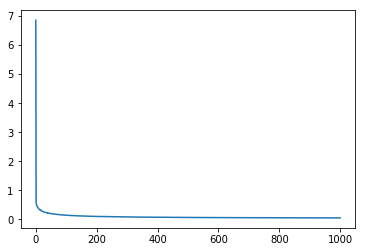

In [38]:
#Now we are going to actually creating data and feed it 
#to our model
C, N = 5, 500
means = [[2,2], [8,3] ,[3,6],[14,2],[12,8]]
cov = [[1,0],[0,1]]
#generating the data
X0 = np.random.multivariate_normal(means[0],cov,N)
X1 = np.random.multivariate_normal(means[1],cov,N)
X2 = np.random.multivariate_normal(means[2],cov,N)
X3 = np.random.multivariate_normal(means[3],cov,N)
X4 = np.random.multivariate_normal(means[4],cov,N)
#Combine them horizontally so we have each row is a data point
X = np.concatenate((X0,X1,X2,X3,X4), axis = 0)
Xbar = np.concatenate((X,np.ones((X.shape[0], 1))), axis = 1)
#Setting the label
y = np.asarray(N*[0] + N*[1]+ N*[2]+ N*[3] + N*[4])
W_init = np.random.randn(Xbar.shape[1] , C)
W, loss = softmax_fit(Xbar,y,W_init,lr = 0.01, nepochs = 1000, tol = 1e-5 , batch_size = 10 )

import matplotlib.pyplot as plt
print(loss[-1])
plt.plot(loss)
plt.show()

In [53]:


xm = np.arange(-2, 18, 0.025)
xlen = len(xm)
ym = np.arange(-3, 11, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(-1, 1)
yy1 = yy.ravel().reshape(-1, 1)

# print(xx.shape, yy.shape)
XX = np.concatenate(( xx1, yy1, np.ones(( xx.size, 1))), axis = 1)


print(XX.shape)

Z = pred(XX,W)

len(yy1)


(1, 448000)
(448000, 3)


448000